In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [2]:
#reading the dataset
df=pd.read_csv("C://Users//srivalli sana//Downloads//car data.csv")

In [3]:
#EXPLORING AND ANALYZING THE DATASET
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
#checking the dataset has null values in it
df.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [9]:
#if they are null values checking how many null values are there
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

so based on the above analysis we have 0 null values

Based on the dataset info we have 4 categorical columns we need to convert them into numerical data before that we neeed to see how many unique va;ues that those columns have then we can slect the ebst approcah to convert then into numerical and in which way we can/need to convert them into null values

In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
df['Car_Name'].value_counts()

Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64

In [12]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [13]:
df['Selling_type'].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [14]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

so in 4 columns of categorical values we are going to use label encoder cuz they have less no of unique values and fr the car name we are going to use one hot encoding

In [15]:
dummies=pd.get_dummies(df['Car_Name'])

In [16]:
dummies

,800,Activa 3g,Activa 4g,Bajaj ct 100,Bajaj Avenger 150,Bajaj Avenger 150 street,Bajaj Avenger 220,Bajaj Avenger 220 dtsi,Bajaj Avenger Street 220,Bajaj Discover 100,...,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df=pd.concat([df,dummies],axis=1)

In [18]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,800,...,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,False,...,False,False,True,False,False,False,False,False,False,False
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,False,...,False,False,False,False,False,True,False,False,False,False
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,False,...,False,False,False,False,False,False,False,False,False,False
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,False,...,False,False,False,False,False,False,False,False,True,False
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,False,...,False,False,False,False,False,False,False,False,False,False
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,False,...,False,False,False,False,False,False,False,False,False,False
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,False,...,False,False,False,False,False,False,False,False,False,False
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
#so we are dropping car name here by
df.drop('Car_Name',inplace=True,axis=1)

In [20]:
#now using label encoder fr remaining categorical columuns
le=LabelEncoder()
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Selling_type']=le.fit_transform(df['Selling_type'])
df['Transmission']=le.fit_transform(df['Transmission'])

In [21]:
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,800,Activa 3g,...,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent
0,2014,3.35,5.59,27000,2,0,1,0,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2013,4.75,9.54,43000,1,0,1,0,False,False,...,False,False,False,False,False,True,False,False,False,False
2,2017,7.25,9.85,6900,2,0,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2011,2.85,4.15,5200,2,0,1,0,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2014,4.60,6.87,42450,1,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
297,2015,4.00,5.90,60000,2,0,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
298,2009,3.35,11.00,87934,2,0,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
299,2017,11.50,12.50,9000,1,0,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
#splitting the data into target and features
X=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [23]:
#splitting the data into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [24]:
X_train.shape,X_test.shape

((210, 105), (91, 105))

In [25]:
#cuz we need to  train the model i have selected 3 models linear regression,random forest regresssor and il choose best model among them

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
lr.score(X_test,y_test)

0.7539698427858557

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [31]:
rf.score(X_test,y_test)

0.9552139920307063

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [34]:
dt.score(X_test,y_test)

0.9524654969996825

so based on above results we can say that RandomForestRegressor is our top model

In [35]:
#evaluating the model
y_pred=rf.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score

In [37]:
mae=mean_absolute_error(y_pred,y_test)
mae

0.6079428571428572

In [38]:
mse=mean_squared_error(y_pred,y_test)
mse

0.9456463723076933

In [39]:
rmse=root_mean_squared_error(y_pred,y_test)
rmse

0.9724435059722972

In [40]:
r2=r2_score(y_pred,y_test)
r2

0.9548531068856587

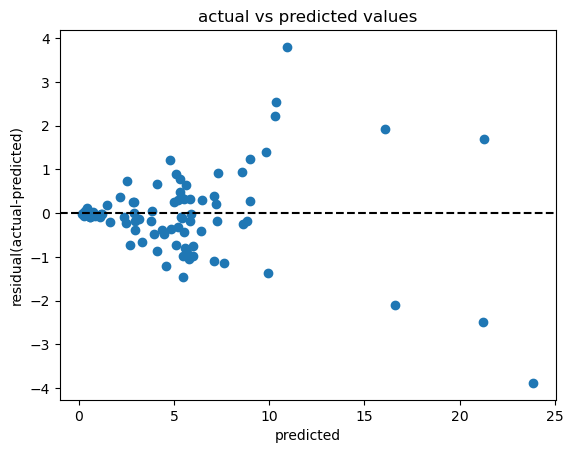

In [41]:
#plotting residual values
residual=y_test-y_pred
plt.scatter(y_pred,residual,marker='o')
plt.axhline(0,color='black',linestyle='--')
plt.xlabel('predicted')
plt.ylabel('residual(actual-predicted)')
plt.title('actual vs predicted values')
plt.show()

#### Feature Extraction

In [42]:
feature_importances = rf.feature_importances_ 
feature_importances

array([6.38583799e-02, 8.76247182e-01, 2.74046113e-02, 2.38680140e-03,
       5.54832843e-03, 3.19051234e-03, 3.29857700e-03, 3.15701004e-05,
       0.00000000e+00, 3.18684418e-07, 7.79146817e-07, 9.58866977e-07,
       0.00000000e+00, 1.80052160e-06, 2.27936924e-07, 3.11666752e-08,
       2.25218259e-08, 3.16408253e-07, 0.00000000e+00, 2.94029021e-07,
       0.00000000e+00, 1.56608254e-06, 7.48946204e-07, 2.09324218e-07,
       1.01814130e-07, 7.32993484e-07, 0.00000000e+00, 7.89343577e-07,
       9.37420166e-08, 0.00000000e+00, 3.39275669e-07, 0.00000000e+00,
       1.38905526e-07, 1.04888672e-06, 1.86694809e-07, 0.00000000e+00,
       5.58763990e-08, 4.20263528e-07, 1.36351673e-07, 5.96197983e-07,
       4.58824440e-07, 9.57107294e-07, 7.05225231e-07, 1.66402551e-07,
       1.58124635e-05, 5.21146767e-08, 2.57828609e-06, 3.04885427e-07,
       6.46039983e-07, 3.48246988e-07, 3.11698998e-06, 6.34327053e-08,
       2.93490922e-06, 2.08666000e-06, 9.38529481e-06, 2.45909146e-06,
      

#### Hyperparameter Tuning

In [45]:
param_grids={
    'n_estimators':[100,150,200,250],
    'max_features':['sqrt', 'log2', None],
    'criterion':['squared_error','absolute_error']
}

In [46]:
from sklearn.model_selection import GridSearchCV

In [57]:
gs=GridSearchCV(estimator=rf,param_grid=param_grids,cv=5)

In [59]:
gsf=gs.fit(X_train,y_train)

In [61]:
gsf.best_params_

{'criterion': 'absolute_error', 'max_features': None, 'n_estimators': 200}

In [62]:
gsf.best_score_

np.float64(0.8232396802657101)

In [63]:
gsf.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_features=None,
                      n_estimators=200)

In [67]:
from sklearn.model_selection import cross_val_score,KFold

In [68]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
crs=cross_val_score(rf,X,y,cv=kf)

In [69]:
crs

array([0.961148  , 0.90685467, 0.8854358 , 0.90945498, 0.95885301])

In [71]:
#saving model
import joblib
joblib.dump(gsf.best_estimator_,'car_price_prediction.pkl')

['car_price_prediction.pkl']